In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('letterdata.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
df.shape, df.isnull().sum()

((20000, 17),
 letter    0
 xbox      0
 ybox      0
 width     0
 height    0
 onpix     0
 xbar      0
 ybar      0
 x2bar     0
 y2bar     0
 xybar     0
 x2ybar    0
 xy2bar    0
 xedge     0
 xedgey    0
 yedge     0
 yedgex    0
 dtype: int64)

In [4]:
df.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

### Seperate the Input and Output Variables

In [5]:
# Input Data
x = df.drop('letter', axis = 1)

# Output Data
y = df['letter']

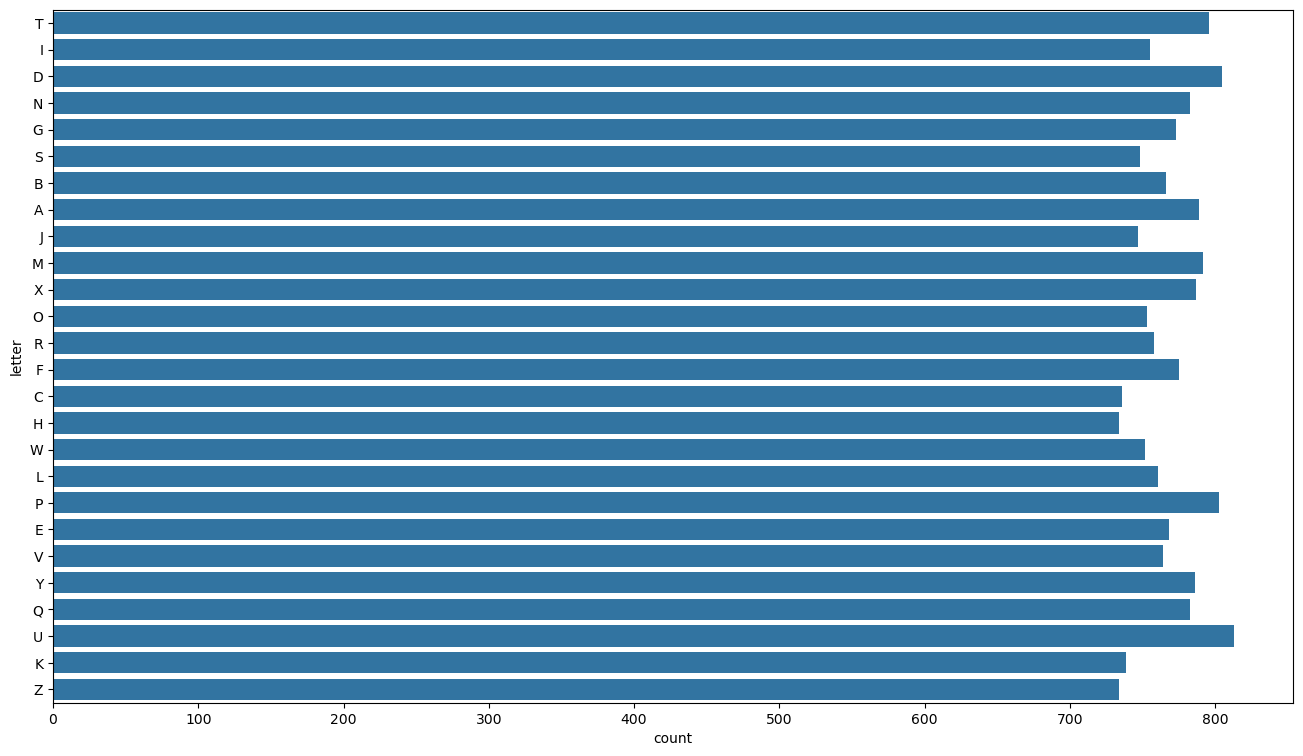

In [6]:
plt.figure(figsize=(16,9))
sns.countplot(y = y);

### Cross Validation

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16000, 16), (4000, 16), (16000,), (4000,))

### Build the model

In [8]:
svm = SVC(kernel='sigmoid', random_state=0)

svm.fit(x_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [9]:
y_pred = svm.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.02      0.43      0.05       147
           B       0.00      0.00      0.00       158
           C       0.00      0.00      0.00       156
           D       0.00      0.00      0.00       171
           E       0.00      0.00      0.00       145
           F       0.00      0.00      0.00       167
           G       0.00      0.00      0.00       182
           H       0.00      0.00      0.00       123
           I       0.00      0.00      0.00       127
           J       0.00      0.00      0.00       159
           K       0.00      0.00      0.00       143
           L       0.00      0.00      0.00       159
           M       0.00      0.00      0.00       173
           N       0.00      0.00      0.00       134
           O       0.00      0.00      0.00       142
           P       0.00      0.00      0.00       165
           Q       0.00      0.00      0.00       145
           R       0.00    

C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [10]:
acc = accuracy_score(y_test, y_pred)
acc

0.029

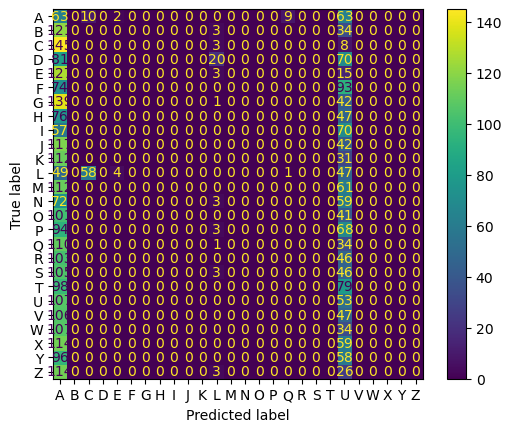

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [12]:
# rbf : 0.9335
# linear: 0.8655
# Poly : 0.95425
# sigmoid : 0.029

In [13]:
new = pd.DataFrame(
    [[6,9,9,7,6,5,6,3,5,10,9,9,8,5,2,7],
    [5,10,7,8,5,6,10,2,6,13,7,5,1,10,2,7]], columns=x.columns)
new

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,6,9,9,7,6,5,6,3,5,10,9,9,8,5,2,7
1,5,10,7,8,5,6,10,2,6,13,7,5,1,10,2,7


In [14]:
svm = SVC(kernel='poly', random_state=0)
svm.fit(x_train, y_train)
y_pred1= svm.predict(new)
y_pred1

array(['M', 'F'], dtype=object)

In [15]:
y_pred2= svm.predict(x_test)

acc = accuracy_score(y_test, y_pred2)
acc

0.95425